<a href="https://colab.research.google.com/github/redom13/ML/blob/main/pytorch_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dependencies

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Making Classification Data

In [2]:
from sklearn.datasets import make_circles


# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [3]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [4]:
# Check different labels
circles.label.value_counts()

,count
label,
1,500
0,500


Visualizing the data

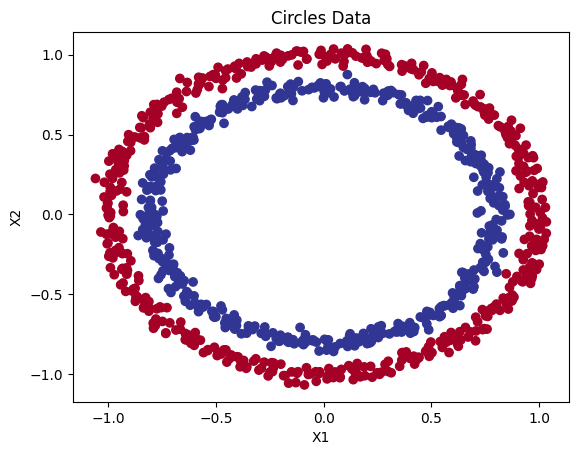

In [5]:
plt.scatter(x=circles['X1'],
            y=circles['X2'],
            c=circles['label'],
            cmap=plt.cm.RdYlBu);
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Circles Data');

In [6]:
circles['X1'].shape

(1000,)

# Turn data into tensors and create train test split

In [7]:
# Turn data into tensors
# Otherwise this causes issues with computations later on

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Builiding the Model

In [9]:
from torch import nn

# Make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [10]:
# Defining a class for the model
class MyNNClassifier(nn.Module):
  def __init__(self,input_features,hidden_units,output_features):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units*2),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units*2,out_features=output_features),
        # Not using nn.Sigmoid here..will use that later
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

# Creating an instance
torch.manual_seed(42)
model_1=MyNNClassifier(X.shape[1],10,1).to(device)
model_1

MyNNClassifier(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=1, bias=True)
  )
)